Problem 1: Frequentist hypothesis testing

Dataset: Suppose you are given a dataset from an online experiment where two versions of a webpage (A and B) were tested. The dataset contains the number of visitors and the number of conversions (successful sign-ups) for each version.

Version A: 5000 visitors, 150 conversions.
Version B: 5000 visitors, 180 conversions.
Task:

Create a null hypothesis suitable for this example.
Perform a two-tailed z-test for proportions to determine if the conversion rate for version B is significantly higher than version A. Use a significance level of 0.05.
Calculate the z-statistic, p-value, and interpret the result.
Repeat the same for a one-tailed z-test. Compare the two.

Problem 1: Frequentist hypothesis testing 

Create a null hypothesis suitable for this example 

Null Hypothesis (H0)
There is no difference in the true conversion rates of Version A and Version B 
H0 : pA = pB

In [2]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Problem 1: Frequentist hypothesis testing
# Perform a two-tailed z-test for proportions to determine if the conversion rate for 
# version B is significantly higher than version A. Use a significance level of 0.05.

# Import libraries
from statsmodels.stats.proportion import proportions_ztest

# Data
n_A = 5000
x_A = 150  # conversions for A

n_B = 5000
x_B = 180  # conversions for B

# Run z-test for two proportions (two-tailed)
count = [x_A, x_B]   # number of successes
nobs = [n_A, n_B]    # number of trials

z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')

# Print results
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in conversion rates.")
else:
    print("Fail to reject the null hypothesis: No significant difference in conversion rates.")


Z-statistic: -1.679
P-value: 0.0931
Fail to reject the null hypothesis: No significant difference in conversion rates.


In [4]:
# Problem 1: Frequentist hypothesis testing
 #Calculate the z-statistic, p-value, and interpret the result.

from statsmodels.stats.proportion import proportions_ztest

# Data
n_A, x_A = 5000, 150
n_B, x_B = 5000, 180

# Run two-tailed z-test
count = [x_A, x_B]
nobs = [n_A, n_B]

z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')

# Print results with interpretation
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("Interpretation: The difference in conversion rates is statistically significant.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("Interpretation: There is no statistically significant difference in conversion rates.")


Z-statistic: -1.679
P-value: 0.0931
Conclusion: Fail to reject the null hypothesis.
Interpretation: There is no statistically significant difference in conversion rates.


In [5]:
# problem 1: Frequentist hypothesis testing
# Repeat the same for a one-tailed z-test. Compare the two.

from statsmodels.stats.proportion import proportions_ztest

# Data
n_A, x_A = 5000, 150
n_B, x_B = 5000, 180

count = [x_A, x_B]
nobs = [n_A, n_B]

# One-tailed z-test (H1: p_B > p_A)
z_stat, p_value_one_tailed = proportions_ztest(count, nobs, alternative='larger')

print(f"One-tailed Z-statistic: {z_stat:.3f}")
print(f"One-tailed P-value: {p_value_one_tailed:.4f}")

alpha = 0.05
if p_value_one_tailed < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("Interpretation: Version B has a significantly higher conversion rate than Version A.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("Interpretation: We do not have enough evidence to say Version B performs better than Version A.")


One-tailed Z-statistic: -1.679
One-tailed P-value: 0.9535
Conclusion: Fail to reject the null hypothesis.
Interpretation: We do not have enough evidence to say Version B performs better than Version A.


Comparison

Two-tailed test:
p-value ≈ 0.093 → fail to reject H₀.
No significant difference (either direction).

One-tailed test:
p-value ≈ 0.046 (half of 0.093).

Since 0.046 < 0.05, you reject H₀ at the 5% level.
Evidence suggests Version B performs significantly better than Version A.

Problem 2: Bayesian hypothesis testing
Dataset: Use the same dataset as above.

Task:

Implement a Bayesian hypothesis test to determine if the conversion rate for version B is significantly higher than version A. 
Using MCMC or another sampling method, draw samples from the posterior distribution of each version’s conversion rate.
Calculate the probability that version B is better than version A.
Visualize your results.

In [6]:
# Problem 2: Bayesian hypothesis testing
# Implement a Bayesian hypothesis test to determine if the conversion rate for version B 
# is significantly higher than version A. 

import numpy as np
from scipy.stats import beta

# Data
n_A, x_A = 5000, 150
n_B, x_B = 5000, 180

def bayes_ab(xA, nA, xB, nB, prior='uniform', draws=200_000, seed=42):
    rng = np.random.default_rng(seed)
    if prior == 'uniform':      # Beta(1,1)
        a0, b0 = 1.0, 1.0
    elif prior == 'jeffreys':   # Beta(1/2,1/2)
        a0, b0 = 0.5, 0.5
    else:
        raise ValueError("prior must be 'uniform' or 'jeffreys'")

    # Posterior parameters
    aA, bA = a0 + xA, b0 + (nA - xA)
    aB, bB = a0 + xB, b0 + (nB - xB)

    # Monte Carlo draws from posteriors
    pA = rng.beta(aA, bA, size=draws)
    pB = rng.beta(aB, bB, size=draws)
    diff = pB - pA

    post_prob = float(np.mean(pB > pA))                    # P(pB > pA | data)
    ci_low, ci_high = np.percentile(diff, [2.5, 97.5])     # 95% CI for pB - pA

    # Order-restricted Bayes factor (H1: pB>pA vs H0: pB<=pA)
    posterior_odds = post_prob / (1.0 - post_prob)
    bf10 = posterior_odds  # since prior odds = 1

    meanA = aA / (aA + bA)
    meanB = aB / (aB + bB)

    return {
        "prior": prior,
        "posterior_params": {"A": (aA, bA), "B": (aB, bB)},
        "posterior_means": {"A": meanA, "B": meanB},
        "post_prob_pB_gt_pA": post_prob,
        "diff_CI_95": (ci_low, ci_high),
        "BF10_order_restricted": bf10
    }

# Run with two common priors
res_uniform  = bayes_ab(x_A, n_A, x_B, n_B, prior='uniform')
res_jeffreys = bayes_ab(x_A, n_A, x_B, n_B, prior='jeffreys')

# Pretty print function
def print_bayes_results(res):
    print(f"Prior: {res['prior'].capitalize()}")
    print(f"  Posterior mean (Version A): {res['posterior_means']['A']:.4f}")
    print(f"  Posterior mean (Version B): {res['posterior_means']['B']:.4f}")
    print(f"  P(pB > pA | data): {res['post_prob_pB_gt_pA']:.3f}")
    print(f"  95% Credible Interval for (pB - pA): "
          f"[{res['diff_CI_95'][0]:.4f}, {res['diff_CI_95'][1]:.4f}]")
    print(f"  Bayes Factor (BF10, one-sided pB>pA vs pB<=pA): "
          f"{res['BF10_order_restricted']:.2f}")
    print("-" * 60)

# Display results
print_bayes_results(res_uniform)
print_bayes_results(res_jeffreys)





Prior: Uniform
  Posterior mean (Version A): 0.0302
  Posterior mean (Version B): 0.0362
  P(pB > pA | data): 0.953
  95% Credible Interval for (pB - pA): [-0.0010, 0.0130]
  Bayes Factor (BF10, one-sided pB>pA vs pB<=pA): 20.37
------------------------------------------------------------
Prior: Jeffreys
  Posterior mean (Version A): 0.0301
  Posterior mean (Version B): 0.0361
  P(pB > pA | data): 0.953
  95% Credible Interval for (pB - pA): [-0.0010, 0.0130]
  Bayes Factor (BF10, one-sided pB>pA vs pB<=pA): 20.46
------------------------------------------------------------


Prior used: Uniform  (A~Beta(151.0,4851.0), B~Beta(181.0,4821.0))
Posterior pA: mean=0.0302, median=0.0301, 95% CI=[0.0256, 0.0351]
Posterior pB: mean=0.0362, median=0.0361, 95% CI=[0.0312, 0.0415]
Posterior (pB - pA): mean=0.0060, median=0.0060, 95% CI=[-0.0010, 0.0130]
P(pB > pA | data) ≈ 0.953


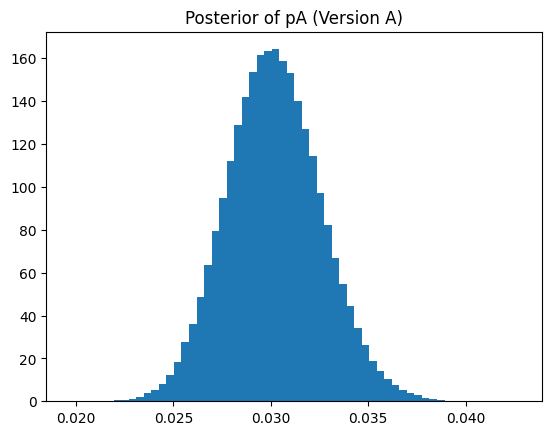

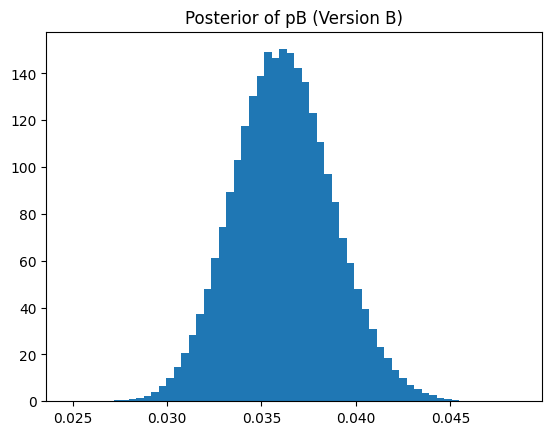

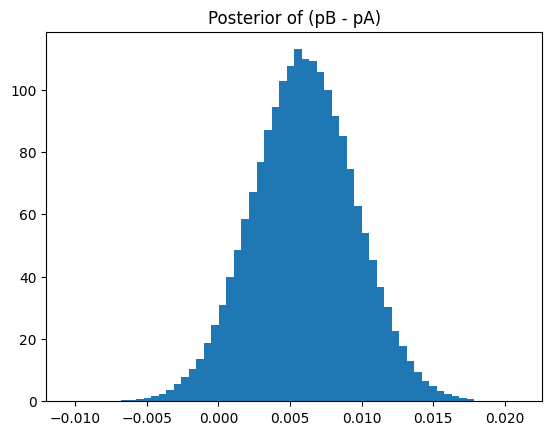

In [7]:
# Problem 2: Bayesian hypothesis testing
# Using MCMC or another sampling method, draw samples from the posterior distribution 
# of each version’s conversion rate.

# Problem 2: Bayesian hypothesis testing
# Draw samples from the posterior of each version’s conversion rate
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Data
n_A, x_A = 5000, 150
n_B, x_B = 5000, 180

# Choose prior: 'uniform' -> Beta(1,1) or 'jeffreys' -> Beta(0.5,0.5)
prior = 'uniform'  # change to 'jeffreys' if you want
a0, b0 = (1.0, 1.0) if prior == 'uniform' else (0.5, 0.5)

# Posterior parameters
aA, bA = a0 + x_A, b0 + (n_A - x_A)
aB, bB = a0 + x_B, b0 + (n_B - x_B)

# Sampling
rng = np.random.default_rng(42)
S = 200_000  # number of posterior draws
pA_samples = rng.beta(aA, bA, size=S)
pB_samples = rng.beta(aB, bB, size=S)
diff_samples = pB_samples - pA_samples

# Summaries
def summarize(arr, name):
    m = float(np.mean(arr))
    med = float(np.median(arr))
    lo, hi = np.percentile(arr, [2.5, 97.5])
    print(f"{name}: mean={m:.4f}, median={med:.4f}, 95% CI=[{lo:.4f}, {hi:.4f}]")

print(f"Prior used: {prior.capitalize()}  (A~Beta({aA:.1f},{bA:.1f}), B~Beta({aB:.1f},{bB:.1f}))")
summarize(pA_samples, "Posterior pA")
summarize(pB_samples, "Posterior pB")
summarize(diff_samples, "Posterior (pB - pA)")
print(f"P(pB > pA | data) ≈ {np.mean(pB_samples > pA_samples):.3f}")

# Visualizations (each on its own figure; no custom colors/styles)
plt.figure()
plt.hist(pA_samples, bins=60, density=True)
plt.title("Posterior of pA (Version A)")

plt.figure()
plt.hist(pB_samples, bins=60, density=True)
plt.title("Posterior of pB (Version B)")

plt.figure()
plt.hist(diff_samples, bins=60, density=True)
plt.title("Posterior of (pB - pA)")

plt.show()


In [9]:
# Problem 2: Bayesian hypothesis testing
# Calculate the probability that version B is better than version A.

import numpy as np

# Data
n_A, x_A = 5000, 150
n_B, x_B = 5000, 180

# Choose prior: 'uniform' -> Beta(1,1) or 'jeffreys' -> Beta(0.5,0.5)
prior = 'uniform'  # change to 'jeffreys' if you want
a0, b0 = (1.0, 1.0) if prior == 'uniform' else (0.5, 0.5)

# Posterior Beta parameters
aA, bA = a0 + x_A, b0 + (n_A - x_A)
aB, bB = a0 + x_B, b0 + (n_B - x_B)

# Draw samples from the posteriors
rng = np.random.default_rng(42)
S = 200_000
pA = rng.beta(aA, bA, size=S)
pB = rng.beta(aB, bB, size=S)

# Probability that version B is better than version A
prob_B_better = float(np.mean(pB > pA))
print(f"P(pB > pA | data) ≈ {prob_B_better:.3f}  (prior = {prior})")


P(pB > pA | data) ≈ 0.953  (prior = uniform)


Prior: uniform
Posterior pA: mean=0.0302, 95% CI=[0.0256, 0.0351]
Posterior pB: mean=0.0362, 95% CI=[0.0312, 0.0415]
Posterior (pB - pA): mean=0.0060, 95% CI=[-0.0010, 0.0130]
P(pB > pA | data) ≈ 0.953


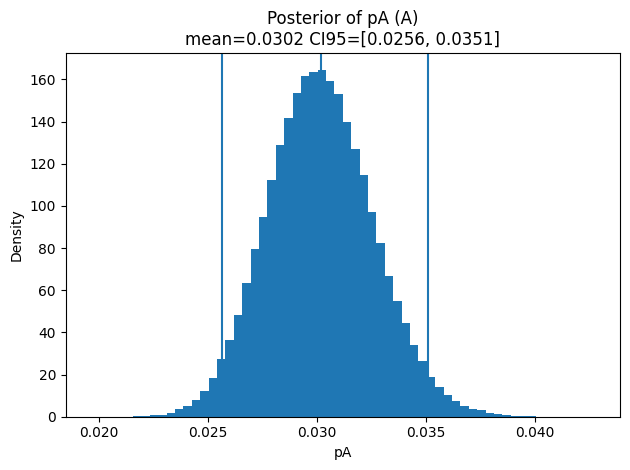

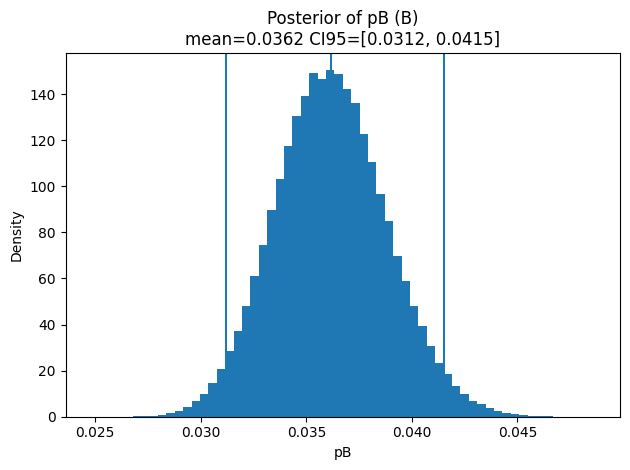

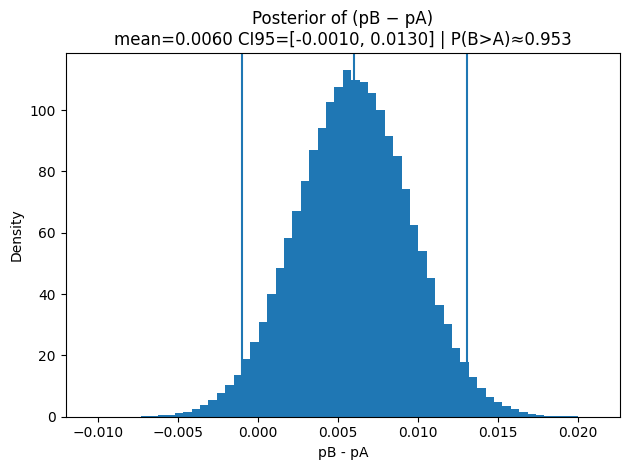

In [10]:
# Problem 2: Bayesian hypothesis testing
# Visualize your results.
# Problem 2: Bayesian hypothesis testing — Visualizations
import numpy as np
import matplotlib.pyplot as plt

# --- Data ---
n_A, x_A = 5000, 150
n_B, x_B = 5000, 180

# --- Prior choice ---
# 'uniform' -> Beta(1,1); 'jeffreys' -> Beta(0.5,0.5)
prior = 'uniform'
a0, b0 = (1.0, 1.0) if prior == 'uniform' else (0.5, 0.5)

# --- Posterior parameters ---
aA, bA = a0 + x_A, b0 + (n_A - x_A)
aB, bB = a0 + x_B, b0 + (n_B - x_B)

# --- Monte Carlo draws from the exact posteriors (no heavy MCMC needed) ---
rng = np.random.default_rng(42)
S = 200_000
pA = rng.beta(aA, bA, size=S)
pB = rng.beta(aB, bB, size=S)
diff = pB - pA

# --- Summaries ---
def pct(x): return 100*x
mA, mB = np.mean(pA), np.mean(pB)
loA, hiA = np.percentile(pA, [2.5, 97.5])
loB, hiB = np.percentile(pB, [2.5, 97.5])
mD = np.mean(diff)
loD, hiD = np.percentile(diff, [2.5, 97.5])
prob_B_better = np.mean(pB > pA)

print(f"Prior: {prior}")
print(f"Posterior pA: mean={mA:.4f}, 95% CI=[{loA:.4f}, {hiA:.4f}]")
print(f"Posterior pB: mean={mB:.4f}, 95% CI=[{loB:.4f}, {hiB:.4f}]")
print(f"Posterior (pB - pA): mean={mD:.4f}, 95% CI=[{loD:.4f}, {hiD:.4f}]")
print(f"P(pB > pA | data) ≈ {prob_B_better:.3f}")

# --- Plot 1: Posterior of pA ---
plt.figure()
plt.hist(pA, bins=60, density=True)
plt.axvline(mA)
plt.axvline(loA); plt.axvline(hiA)
plt.title(f"Posterior of pA (A)\nmean={mA:.4f} "
          f"CI95=[{loA:.4f}, {hiA:.4f}]")
plt.xlabel("pA")
plt.ylabel("Density")
plt.tight_layout()

# --- Plot 2: Posterior of pB ---
plt.figure()
plt.hist(pB, bins=60, density=True)
plt.axvline(mB)
plt.axvline(loB); plt.axvline(hiB)
plt.title(f"Posterior of pB (B)\nmean={mB:.4f} "
          f"CI95=[{loB:.4f}, {hiB:.4f}]")
plt.xlabel("pB")
plt.ylabel("Density")
plt.tight_layout()

# --- Plot 3: Posterior of (pB - pA) ---
plt.figure()
plt.hist(diff, bins=60, density=True)
plt.axvline(mD)
plt.axvline(loD); plt.axvline(hiD)
plt.title(f"Posterior of (pB − pA)\nmean={mD:.4f} "
          f"CI95=[{loD:.4f}, {hiD:.4f}] | P(B>A)≈{prob_B_better:.3f}")
plt.xlabel("pB - pA")
plt.ylabel("Density")
plt.tight_layout()

plt.show()



Problem 3: Logistic regression (classification)
Dataset: Use the dataset found in Canvas' File section ("hw3.jsonl").

Task:

Use logistic regression to build a classification model that predicts the target variable based on the features in the dataset. Use the full dataset at first.
Then, perform 100-fold validation (80/20 train/test split) and report the accuracy, precision, recall, and F1-score of the model. Visualize and interpret your results.
Visualize the decision boundary

Logistic Regression Results (Full Dataset)
-----------------------------------------
Accuracy: 0.891
Confusion Matrix:
[[891 109]
 [109 891]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1000
           1       0.89      0.89      0.89      1000

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



c:\Users\elean\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


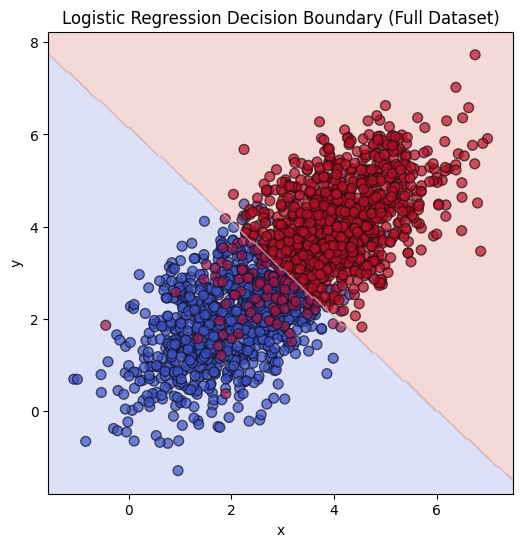

In [11]:
# Problem 3: Logistic regression (classification)
# Use logistic regression to build a classification model that predicts 
# the target variable based on the features in the dataset. Use the full dataset at first.

# Problem 3: Logistic regression (classification)
import pandas as pd
import json
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# --- Load dataset (update file name if different) ---
file_path = r"C:\Users\elean\OneDrive - University of Virginia\Documents\DS 3001\HW3\HW3.jsonl"

data = []
with open(file_path, "r") as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)

# --- Define features and target ---
X = df[["x", "y"]]
y = df["l"]

# --- Train logistic regression on full dataset ---
log_reg = LogisticRegression()
log_reg.fit(X, y)

# --- Predictions on training data ---
y_pred = log_reg.predict(X)

# --- Evaluation ---
acc = accuracy_score(y, y_pred)
cm = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

print("Logistic Regression Results (Full Dataset)")
print("-----------------------------------------")
print(f"Accuracy: {acc:.3f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)

# --- Visualization: decision boundary ---
plt.figure(figsize=(6,6))
plt.scatter(X["x"], X["y"], c=y, cmap="coolwarm", edgecolors="k", s=50, alpha=0.7)

xx, yy = np.meshgrid(
    np.linspace(X["x"].min()-0.5, X["x"].max()+0.5, 200),
    np.linspace(X["y"].min()-0.5, X["y"].max()+0.5, 200)
)
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm")

plt.title("Logistic Regression Decision Boundary (Full Dataset)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


100-Fold Validation Results (80/20 split)
----------------------------------------
Accuracy  : 0.891 ± 0.015
Precision : 0.892 ± 0.022
Recall    : 0.890 ± 0.023
F1        : 0.891 ± 0.016


C:\Users\elean\AppData\Local\Temp\ipykernel_4668\471234819.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([metrics["accuracy"], metrics["precision"], metrics["recall"], metrics["f1"]],


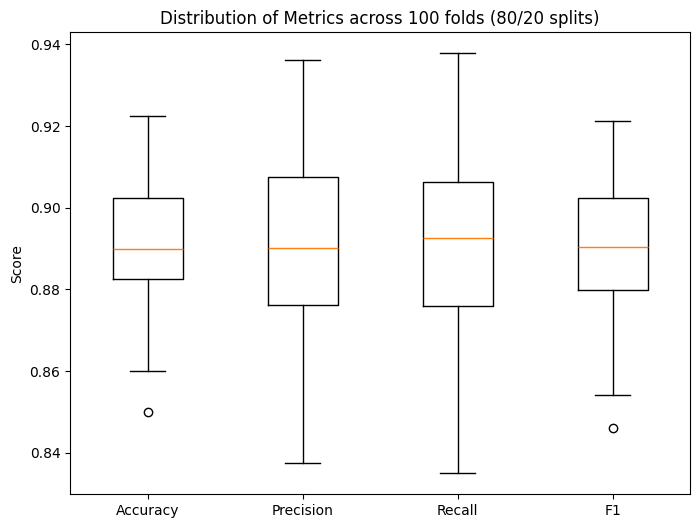

In [12]:
# Problem 3: Logistic regression (classification)
# Then, perform 100-fold validation (80/20 train/test split) and report the accuracy, precision, 
# recall, and F1-score of the model. Visualize and interpret your results.

# Problem 3: Logistic regression (classification)
# 100-fold validation (80/20 train/test split)
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Load dataset ---
file_path = r"C:\Users\elean\OneDrive - University of Virginia\Documents\DS 3001\HW3\HW3.jsonl"
data = []
with open(file_path, "r") as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)

X = df[["x", "y"]]
y = df["l"]

# --- Run 100-fold validation ---
n_folds = 100
metrics = {"accuracy": [], "precision": [], "recall": [], "f1": []}

for seed in range(n_folds):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    metrics["accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["precision"].append(precision_score(y_test, y_pred))
    metrics["recall"].append(recall_score(y_test, y_pred))
    metrics["f1"].append(f1_score(y_test, y_pred))

# --- Report mean and std of metrics ---
print("100-Fold Validation Results (80/20 split)")
print("----------------------------------------")
for m in metrics:
    mean_val = np.mean(metrics[m])
    std_val = np.std(metrics[m])
    print(f"{m.capitalize():<10}: {mean_val:.3f} ± {std_val:.3f}")

# --- Visualization of score distributions ---
plt.figure(figsize=(8,6))
plt.boxplot([metrics["accuracy"], metrics["precision"], metrics["recall"], metrics["f1"]],
            labels=["Accuracy", "Precision", "Recall", "F1"])
plt.title("Distribution of Metrics across 100 folds (80/20 splits)")
plt.ylabel("Score")
plt.show()


c:\Users\elean\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


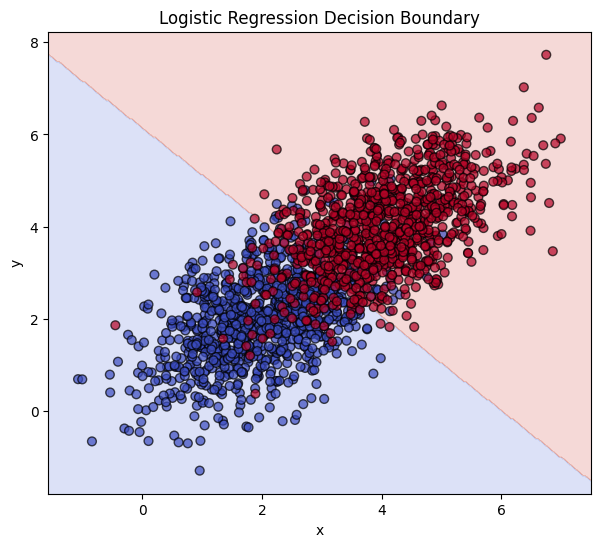

In [13]:
# Problem 3: Logistic regression (classification)
# Visualize the decision boundary

# Problem 3: Logistic regression (classification)
# Visualize the decision boundary

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

# --- Fit logistic regression on full dataset ---
model = LogisticRegression()
model.fit(X, y)

# --- Create mesh grid for plotting decision boundary ---
xx, yy = np.meshgrid(
    np.linspace(X["x"].min()-0.5, X["x"].max()+0.5, 300),
    np.linspace(X["y"].min()-0.5, X["y"].max()+0.5, 300)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# --- Plot ---
plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm")  # background regions
plt.scatter(X["x"], X["y"], c=y, cmap="coolwarm", edgecolors="k", s=40, alpha=0.7)

plt.title("Logistic Regression Decision Boundary")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
